In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
from statistics import median,mode
import math

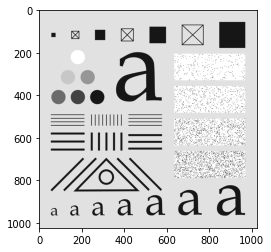

In [28]:
img_1 = mpimg.imread('p2_1.tif')
plt.imshow(img_1,cmap="gray")
m,n = img_1.shape

In [ ]:
print(img_1.shape)
type(img_1)

(1024, 1024)


numpy.ndarray

In [ ]:
std_dev = 15
kernel_size = 43
len_kernel_size = int((kernel_size-1)/2)

def create_kernel(kernel_size,len_kernel_size,std_dev):
  g = 0
  G = [[0.0000]*kernel_size]*kernel_size
  G = np.array(G)
  G.reshape(kernel_size,kernel_size)
  for s,x in zip(range(-len_kernel_size,len_kernel_size+1),range(kernel_size)):
    for t,y in zip(range(-len_kernel_size,len_kernel_size+1),range(kernel_size)):
      d = -((s**2 + t**2)/(2*(std_dev**2)))
      d = math.exp(d)
      g = g + d
      G[x][y] = d
      # print(s,t,d)
  return G,g


def add_padding(kernel_size,img):
  m,n = img.shape
  print("kernel_size:",kernel_size,"n:",n)
  side = [[0] for i in range(kernel_size)]*n
  side = np.array(side)
  side = np.reshape(side, (n,kernel_size))
  top = [0 for i in range(m+(2*kernel_size))]*kernel_size
  top = np.array(top)
  top = np.reshape(top,(kernel_size,m+(2*kernel_size)))
  print("top:",top.shape,"side:",side.shape)
  img_2 = np.append(img,side,axis=1)
  img_2 = np.append(side,img_2,axis=1)
  img_2 = np.append(img_2,top,axis=0)
  img_2 = np.append(top,img_2,axis=0)
  print("img:",img_2.shape)
  return img_2




G, g= create_kernel(kernel_size,len_kernel_size,std_dev)
img_1t = add_padding(len_kernel_size,img_1)

kernel_size: 21 n: 1024
top: (21, 1066) side: (1024, 21)
img: (1066, 1066)


In [39]:
def Kernel_apply(G,img,g):
  m,n = img.shape
  m_k,n_k = G.shape
  img_new = [0 for _ in range(m)]*n
  img_new = np.array(img_new)
  img_new = img_new.reshape(m,n)
  M = m-(m_k-1)
  for i in range(0,M):
    for j in range(0,M):
      # print("j:",j,"j+m_k:",j+m_k)
      a = img[i:i+m_k,j:j+m_k] * G
      s = 0
      for x in a:
        s = s + sum(x)
        # s = s/g
      img_new[i][j] = s
    # print("i:",i)
  return img_new

img_new = Kernel_apply(G,img_1t,g)

In [40]:
img_new.shape

(1066, 1066)

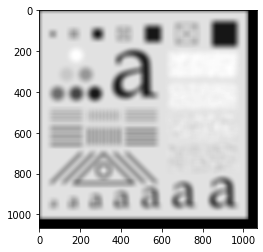

In [41]:
plt.imshow(img_new,cmap="gray")

In [42]:
m2,n2 = img_new.shape
img_new2 = img_new[0:m2-(2*len_kernel_size),0:n2-(2*len_kernel_size)]

(1024, 1024)


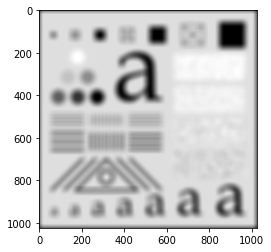

In [43]:
print(img_new2.shape)
plt.imshow(img_new2,cmap="gray")

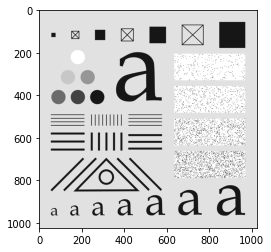

In [ ]:
plt.imshow(img_1,cmap="gray")

In [ ]:
def Kernel_apply(G,img,g):
  m,n = img.shape
  m_k,n_k = G.shape
  img_new = [0 for _ in range(m)]*n
  img_new = np.array(img_new)
  img_new = img_new.reshape(m,n)
  M = m-(m_k-1)
  for i in range(0,M):
    for j in range(0,M):
      # print("j:",j,"j+m_k:",j+m_k)
      a = img[i:i+m_k,j:j+m_k] * (G/g)
      s = 0
      for x in a:
        s = s + sum(x)
      img_new[i][j] = s
    # print("i:",i)
  return img_new

img_new = Kernel_apply(G,img_1t,g)

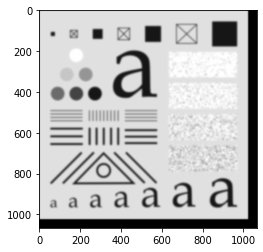

In [ ]:
plt.imshow(img_new,cmap="gray")

In [ ]:
a = [[4,5],[1,2]]
b = [[3],[3]]
a = np.array(a)
b = np.array(b)
# np.append(a,b,axis=1)
s = 0
for i in a:
  s = s + sum(i)
print(s)

12
